# Praktikum ML 5
## Fahrel Gibran Alghany - 24060120130106
### Car Evaluation Dataset with PCA
Created at: 21/11/2022

## Setup

### Import Library

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Import Dataset

In [2]:
# Mendefinisikan link dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Mendefinisikan list berisi kolom-kolom dataset
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data = pd.read_csv(url, names=names)

### Data Understanding and Preprocessing

In [3]:
# Menampilkan 10 data teratas
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
# Encode categorical value for buying and maint
# Encode from vhigh, high, med, low to 4, 3, 2, 1
data['buying'] = data['buying'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
data['maint'] = data['maint'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})

# Encode categorical value for doors
# Encode from 2, 3, 4, 5more to 2, 3, 4, 5
data['doors'] = data['doors'].map({'2': 2, '3': 3, '4': 4, '5more': 5})

# Encode categorical value for persons
# Encode from 2, 4, more to 2, 4, 6
data['persons'] = data['persons'].map({'2': 2, '4': 4, 'more': 6})

# Encode categorical value for lug_boot
# Encode from small, med, big to 1, 2, 3
data['lug_boot'] = data['lug_boot'].map({'small': 1, 'med': 2, 'big': 3})

# Encode categorical value for safety
# Encode from low, med, high to 1, 2, 3
data['safety'] = data['safety'].map({'low': 1, 'med': 2, 'high': 3})

In [5]:
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
5,4,4,2,2,2,3,unacc
6,4,4,2,2,3,1,unacc
7,4,4,2,2,3,2,unacc
8,4,4,2,2,3,3,unacc
9,4,4,2,4,1,1,unacc


In [6]:
# Split x and y
x = data.iloc[:, 0:6]
y = data.iloc[:, 6]

x.head()

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2


In [7]:
# Count how many data for each class
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [8]:
# Standarize
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487, -1.22474487,
        -1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487, -1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487, -1.22474487,
         1.22474487],
       ...,
       [-1.34164079, -1.34164079,  1.34164079,  1.22474487,  1.22474487,
        -1.22474487],
       [-1.34164079, -1.34164079,  1.34164079,  1.22474487,  1.22474487,
         0.        ],
       [-1.34164079, -1.34164079,  1.34164079,  1.22474487,  1.22474487,
         1.22474487]])

## PCA (n = 2)

### Modeling

In [9]:
# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [10]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [11]:
finalDf.head()

,principal component 1,principal component 2,class
0,-1.101351,1.137123,unacc
1,-1.484459,0.968298,unacc
2,-1.867566,0.799473,unacc
3,-1.087668,1.301395,unacc
4,-1.470776,1.132570,unacc


### Visualization

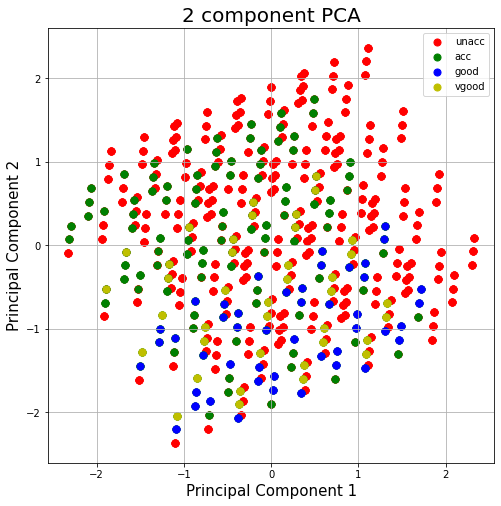

In [12]:
# Visualize
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['unacc', 'acc', 'good', 'vgood']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Evaluation

In [13]:
# Variance
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.16666667 0.16666667]
[41.56921938 41.56921938]


## PCA (n = 3)

### Modeling

In [14]:
# PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, y], axis = 1)

In [15]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-1.005122,-0.319936,1.341641,unacc
1,-1.782739,-0.538583,1.341641,unacc
2,-2.560355,-0.757229,1.341641,unacc
3,-0.900723,0.651320,1.341641,unacc
4,-1.678340,0.432673,1.341641,unacc


### Visualization

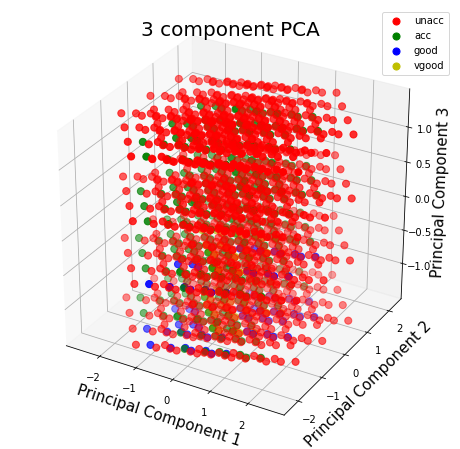

In [16]:
# Visualize
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['unacc', 'acc', 'good', 'vgood']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Evaluation

In [17]:
# Variance
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.16666667 0.16666667 0.16666667]
[41.56921938 41.56921938 41.56921938]


## Conclusion

PCA menggunakan Car Evaluation Dataset mendapatkan hasil yang kurang baik. Terlihat pada variance ratio yang hanya mendapatkan 0.1667 untuk setiap component, baik pada PCA dengan n=2 maupun PCA dengan n=3. Beberapa asumsi saya mengapa hal ini dapat terjadi yaitu:

1. Dataset yang digunakan berupa dataset *categorical*
2. Dataset yang digunakan lebih cocok digunakan untuk *classification* daripada *clustering*
3. Dataset tersebut sangat imbalance di mana class **unacc** berjumlah **1210** dibanding class **acc, good, dan vgood** yang digabung hanya berjumlah **516**. Tidak sampai setengah dari jumlah data **unacc**




